In [ ]:
import pandas as pd

data = pd.read_csv('/content/data-siswa.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nama            1010 non-null   object 
 1   kelas           1010 non-null   object 
 2   transportasi    1010 non-null   object 
 3   penerima_kps    1010 non-null   object 
 4   penerima_pip    1010 non-null   object 
 5   pekerjaan_ayah  922 non-null    object 
 6   gaji_ayah       919 non-null    float64
 7   pekerjaan_ibu   1010 non-null   object 
 8   gaji_ibu        1010 non-null   int64  
 9   jml_saudara     1010 non-null   int64  
 10  anak_ke         998 non-null    float64
 11  layak_bantuan   1010 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 94.8+ KB


In [ ]:
data.head()

,nama,kelas,transportasi,penerima_kps,penerima_pip,pekerjaan_ayah,gaji_ayah,pekerjaan_ibu,gaji_ibu,jml_saudara,anak_ke,layak_bantuan
0,A'ina Astri Purbaningtyas,XII RPL 2,Jalan kaki,Tidak,Tidak,Wiraswasta,1500000.0,Tidak bekerja,0,2,2.0,Tidak
1,Ahmad Raditya Firmansyah,XI TPM 2,Sepeda,Tidak,Ya,Wiraswasta,1500000.0,Tidak bekerja,0,0,2.0,Ya
2,AHMAD RADITYA WICAKSONO,XI LAS,Sepeda,Tidak,Tidak,Karyawan Swasta,1500000.0,Tidak bekerja,0,0,2.0,Ya
3,AHMAD RAFLY HERMANTO,X LAS,Sepeda motor,Tidak,Tidak,Karyawan Swasta,1500000.0,Buruh,800000,0,1.0,Tidak
4,AHMAD RAYNALDY AL FARIZKY,X TITL 1,Sepeda motor,Tidak,Tidak,Karyawan Swasta,1500000.0,Karyawan Swasta,1500000,0,1.0,Tidak


In [ ]:
data.isnull().sum()

,0
nama,0
kelas,0
transportasi,0
penerima_kps,0
penerima_pip,0
pekerjaan_ayah,88
gaji_ayah,91
pekerjaan_ibu,0
gaji_ibu,0
jml_saudara,0


In [ ]:
data_clean = data.dropna()

In [ ]:
data_clean.isnull().sum()

,0
nama,0
kelas,0
transportasi,0
penerima_kps,0
penerima_pip,0
pekerjaan_ayah,0
gaji_ayah,0
pekerjaan_ibu,0
gaji_ibu,0
jml_saudara,0


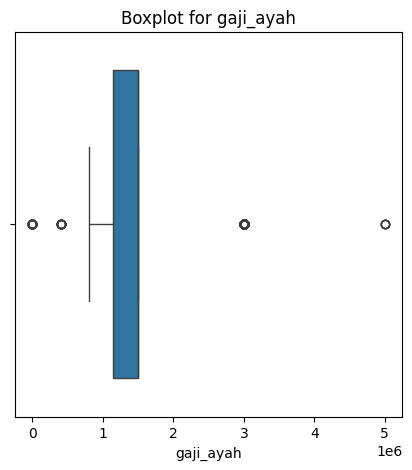

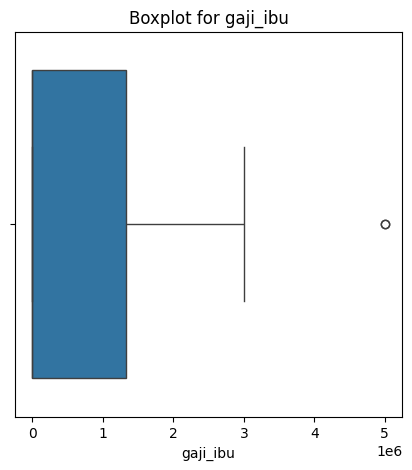

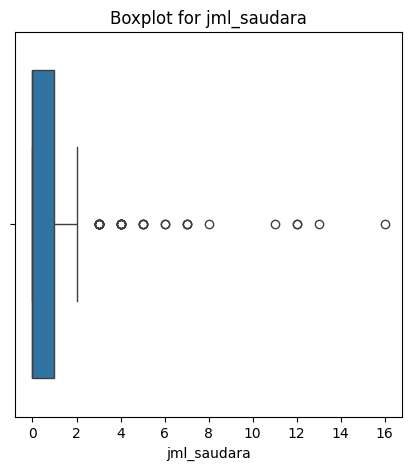

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots(data_clean, features):
    for feature in features:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x=data[feature])
        plt.title(f'Boxplot for {feature}')
        plt.xlabel(feature)
        plt.show()

# Contoh penggunaan
features_to_plot = ['gaji_ayah', 'gaji_ibu', 'jml_saudara']
plot_boxplots(data_clean, features_to_plot)


In [ ]:
data_siswa = data_clean.drop(['kelas', 'nama'], axis=1)

In [ ]:
data_siswa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 908 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transportasi    908 non-null    object 
 1   penerima_kps    908 non-null    object 
 2   penerima_pip    908 non-null    object 
 3   pekerjaan_ayah  908 non-null    object 
 4   gaji_ayah       908 non-null    float64
 5   pekerjaan_ibu   908 non-null    object 
 6   gaji_ibu        908 non-null    int64  
 7   jml_saudara     908 non-null    int64  
 8   anak_ke         908 non-null    float64
 9   layak_bantuan   908 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 78.0+ KB


In [ ]:
categorical_features = ['transportasi', 'penerima_kps', 'penerima_pip', 'pekerjaan_ayah', 'pekerjaan_ibu']
numerical_features = ['gaji_ayah', 'gaji_ibu', 'jml_saudara','anak_ke']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_features:
    data_siswa[feature] = label_encoder.fit_transform(data_siswa[feature])


In [ ]:
data_siswa.head()

,transportasi,penerima_kps,penerima_pip,pekerjaan_ayah,gaji_ayah,pekerjaan_ibu,gaji_ibu,jml_saudara,anak_ke,layak_bantuan
0,2,0,0,11,1500000.0,9,0,2,2.0,Tidak
1,6,0,1,11,1500000.0,9,0,0,2.0,Ya
2,6,0,0,1,1500000.0,9,0,0,2.0,Ya
3,7,0,0,1,1500000.0,0,800000,0,1.0,Tidak
4,7,0,0,1,1500000.0,1,1500000,0,1.0,Tidak


In [ ]:
X = data_siswa[data_siswa.columns[:9]]
y = data_siswa['layak_bantuan']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)

# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Evaluasi model
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {accuracy}')

Akurasi model: 0.7857142857142857


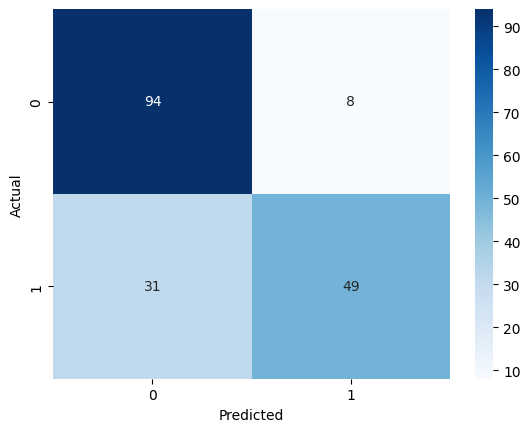

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import joblib

# Simpan model
joblib.dump(model, 'model_1.pkl')

['model_1.pkl']

In [ ]:
model1 = joblib.load('model_1.pkl')

In [ ]:
data_baru = pd.DataFrame({
    'transportasi': [4],
    'penerima_kps': [0],
    'penerima_pip': [0],
    'pekerjaan_ayah': [3],
    'gaji_ayah': [800000],
    'pekerjaan_ibu': [3],
    'gaji_ibu' : [3000000],
    'jml_saudara': [0],
    'anak_ke': [1]
})

In [ ]:
data_baru.head()

,transportasi,penerima_kps,penerima_pip,pekerjaan_ayah,gaji_ayah,pekerjaan_ibu,gaji_ibu,jml_saudara,anak_ke
0,4,0,0,3,800000,3,3000000,0,1


In [ ]:
prediksi_baru = model1.predict(data_baru)

# Jika ingin melihat probabilitas prediksi
probabilitas_baru = model1.predict_proba(data_baru)

# Tampilkan hasil prediksi
print(f"Hasil prediksi: {'Layak' if prediksi_baru[0] == 1 else 'Tidak Layak'}")
print(f"Probabilitas layak bantuan: {probabilitas_baru[0][1] * 100:.2f}%")

Hasil prediksi: Tidak Layak
Probabilitas layak bantuan: 37.01%
